#### Importing necessary Python Libraries

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mlflow

#### Reading dataset

In [21]:
df = pd.read_csv('churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Checking of Null Values and Datatypes

In [22]:
# Looking for missing data
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

RowNumber
RowNumber
False    10000
Name: count, dtype: int64

CustomerId
CustomerId
False    10000
Name: count, dtype: int64

Surname
Surname
False    10000
Name: count, dtype: int64

CreditScore
CreditScore
False    10000
Name: count, dtype: int64

Geography
Geography
False    10000
Name: count, dtype: int64

Gender
Gender
False    10000
Name: count, dtype: int64

Age
Age
False    10000
Name: count, dtype: int64

Tenure
Tenure
False    10000
Name: count, dtype: int64

Balance
Balance
False    10000
Name: count, dtype: int64

NumOfProducts
NumOfProducts
False    10000
Name: count, dtype: int64

HasCrCard
HasCrCard
False    10000
Name: count, dtype: int64

IsActiveMember
IsActiveMember
False    10000
Name: count, dtype: int64

EstimatedSalary
EstimatedSalary
False    10000
Name: count, dtype: int64

Exited
Exited
False    10000
Name: count, dtype: int64



In [23]:
# checking for missing values as well as datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### Checking the summary statistics

In [24]:
# looking at the summary
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### Basic EDA

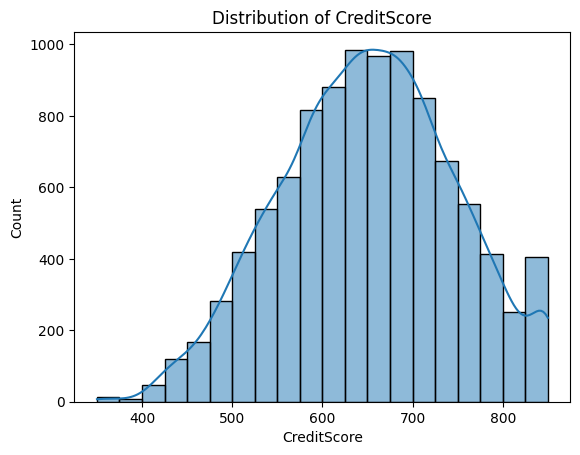

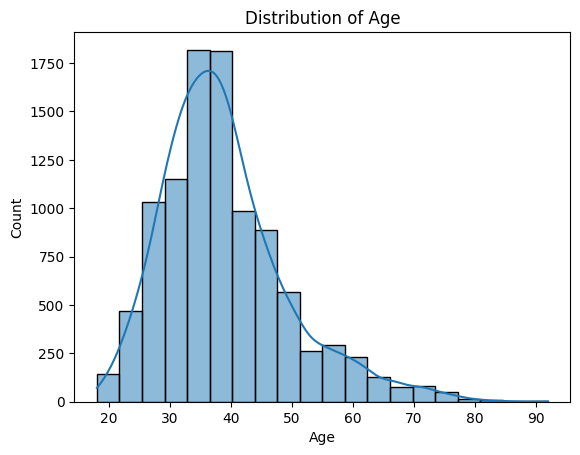

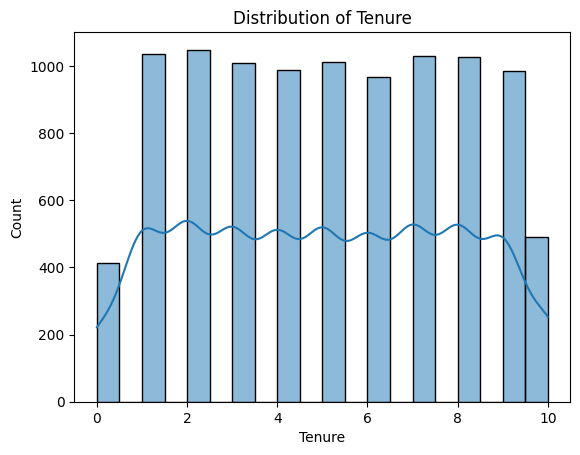

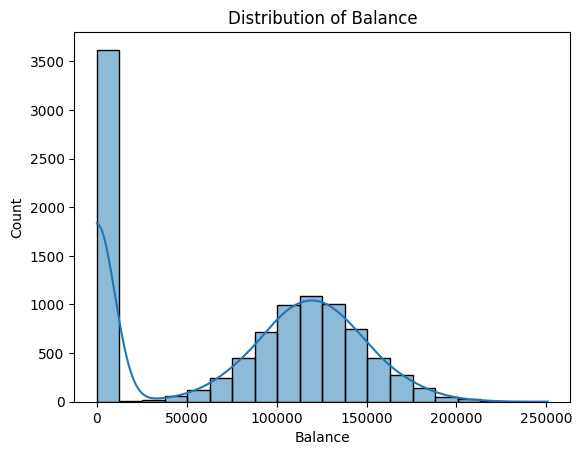

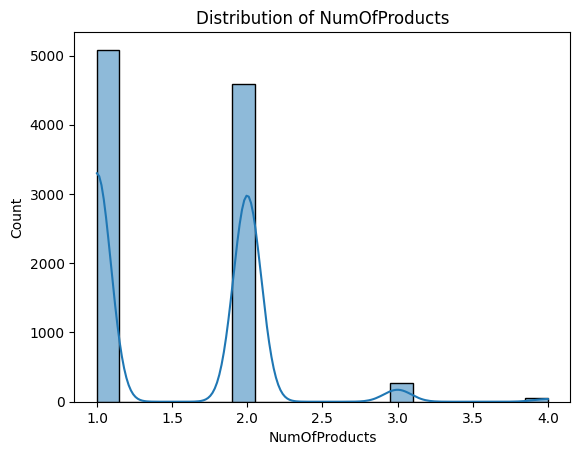

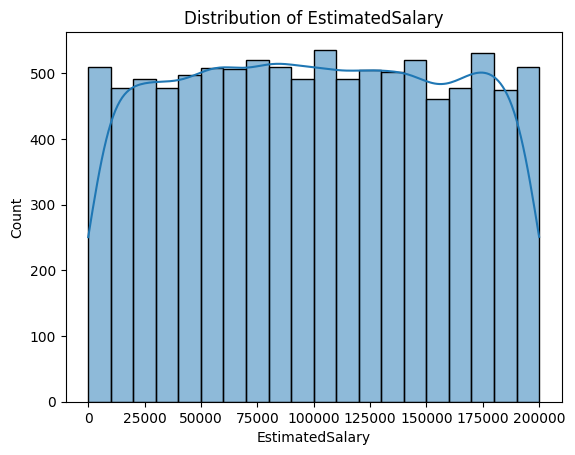

In [25]:
# Data distribution - Numerical columns
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for col in numerical_columns:
    plt.figure()
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [26]:
df['Geography']

0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object

<Axes: xlabel='Geography', ylabel='count'>

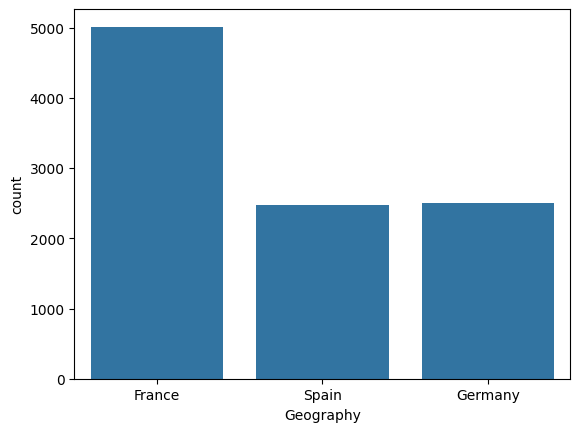

In [27]:
sns.countplot(x = df['Geography'])

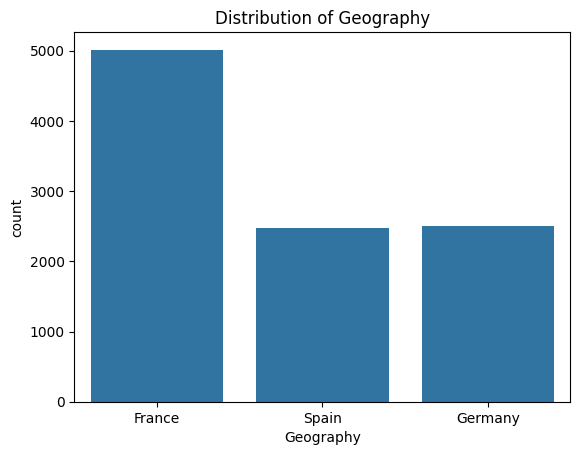

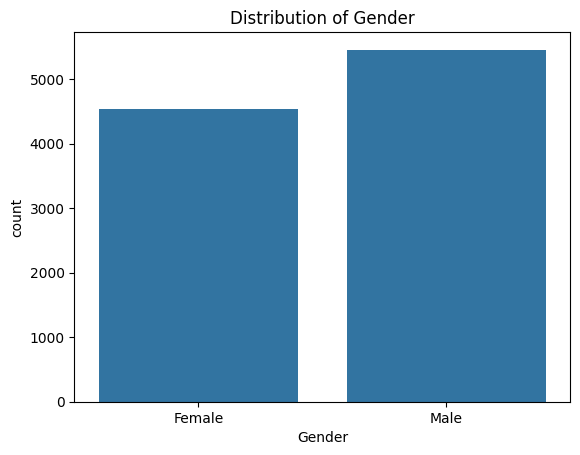

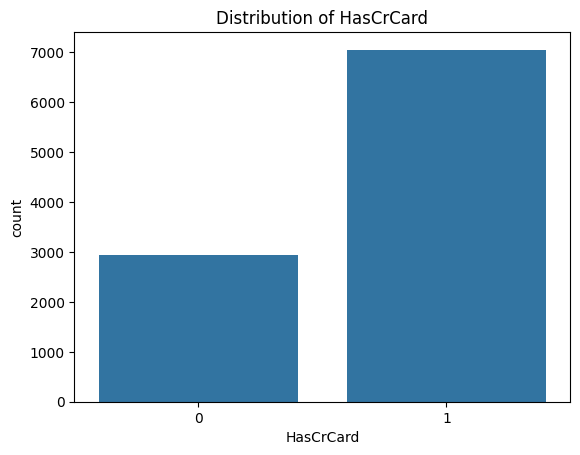

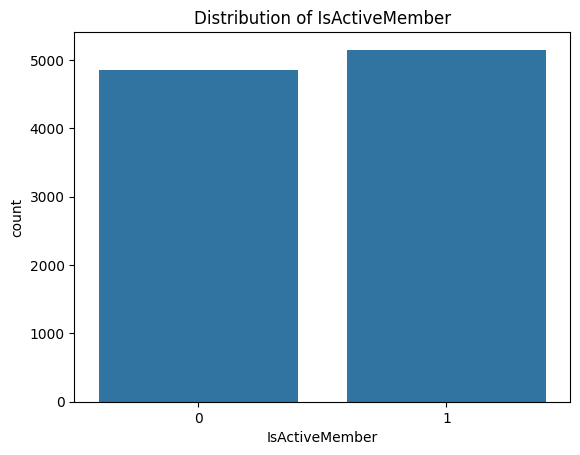

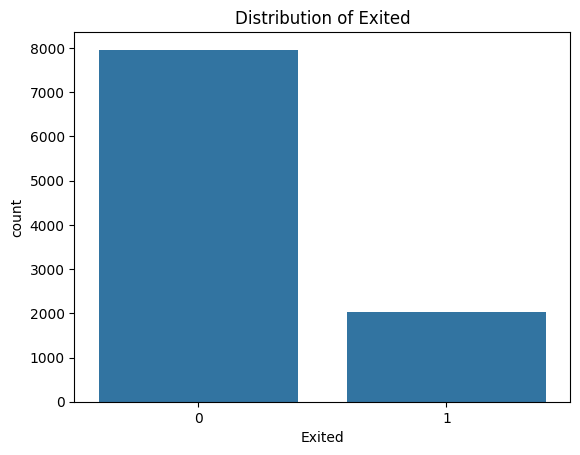

In [28]:
# Categorical variables
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
for col in categorical_columns:
    plt.figure()
    sns.countplot(x = df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

Text(48.429006944444424, 0.5, 'Estimated Salary')

<Figure size 2000x2000 with 0 Axes>

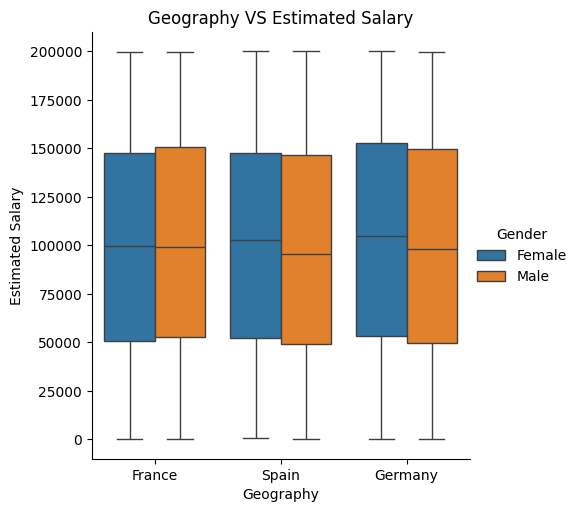

In [29]:
# Looking at Geography and Gender Distribution against Estimated Salary
plt.figure(figsize=(20,20))
sns.catplot(x="Geography", y="EstimatedSalary", hue="Gender", kind="box", data=df)
plt.title("Geography VS Estimated Salary")
plt.xlabel("Geography")
plt.ylabel("Estimated Salary")

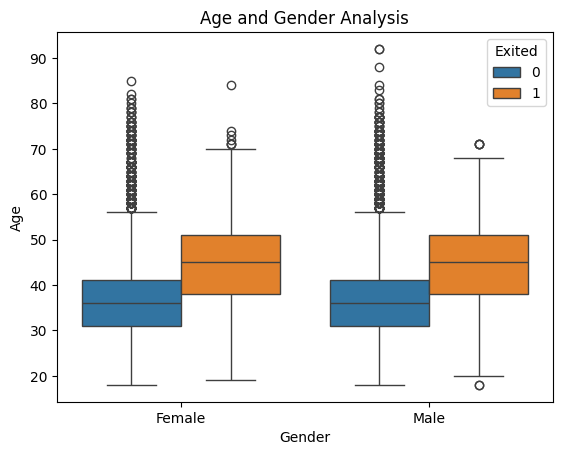

In [30]:
# Gender and Age analysis
plt.figure()
sns.boxplot(x='Gender', y='Age', hue='Exited', data=df)
plt.title('Age and Gender Analysis')
plt.show()

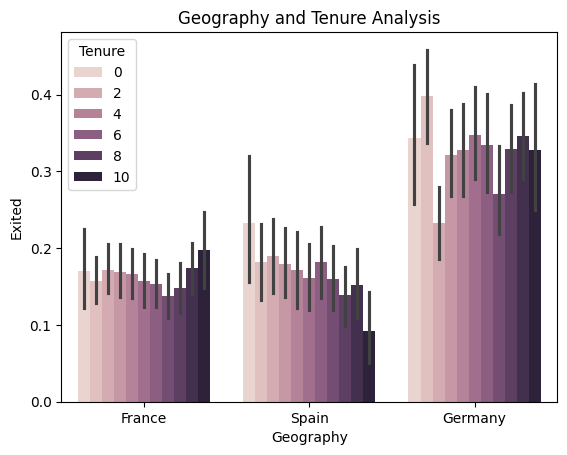

In [31]:
# Geography and Tenure analysis
plt.figure()
sns.barplot(x='Geography', y='Exited', hue='Tenure', data=df)
plt.title('Geography and Tenure Analysis')
plt.show()

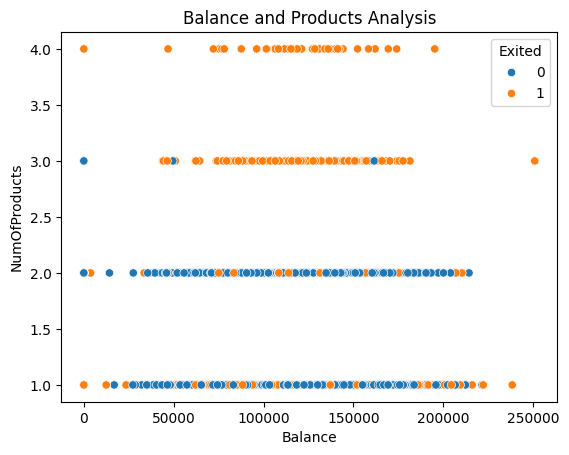

In [32]:
# Balance and Products analysis
plt.figure()
sns.scatterplot(x='Balance', y='NumOfProducts', hue='Exited', data=df)
plt.title('Balance and Products Analysis')
plt.show()

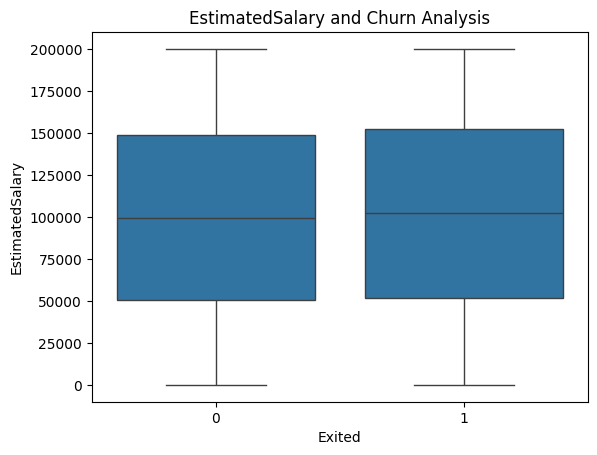

In [33]:
# Salary and Churn analysis
plt.figure()
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.title('EstimatedSalary and Churn Analysis')
plt.show()


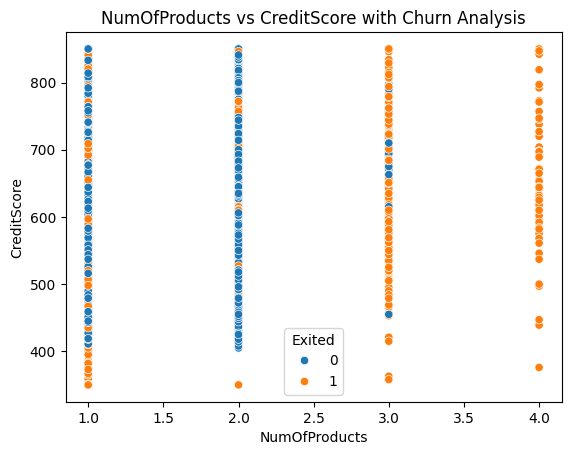

In [34]:
# Feature Interactions - NumOfProducts and CreditScore
plt.figure()
sns.scatterplot(x='NumOfProducts', y='CreditScore', hue='Exited', data=df)
plt.title('NumOfProducts vs CreditScore with Churn Analysis')
plt.show()

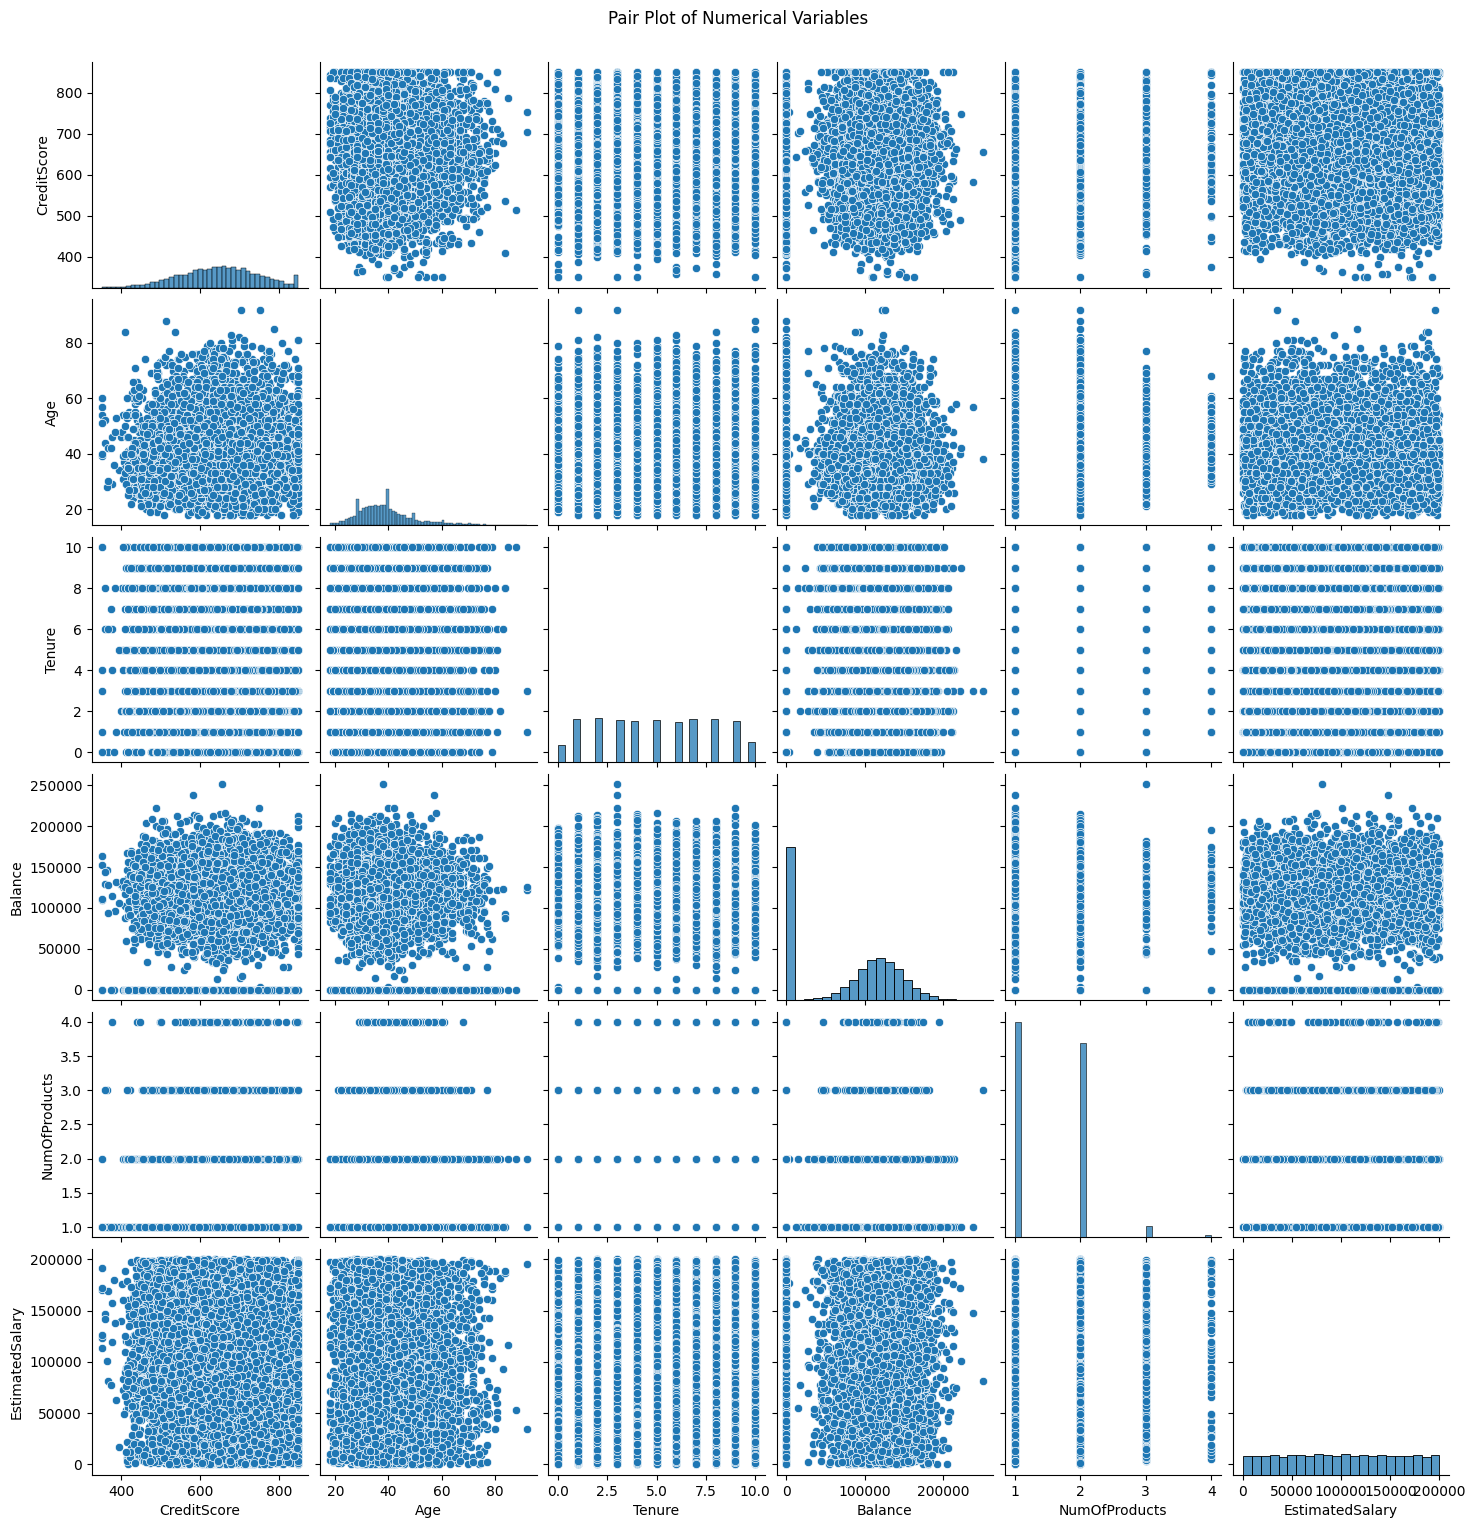

In [35]:
# Data Visualization - Pair Plot
sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

In [36]:

one_hot_encoded_data = pd.get_dummies(df, columns = ['Geography', 'Gender'])

In [37]:
one_hot_encoded_data

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,True,False,False,False,True
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False,False,True
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,True,False,False,True,False
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False,False,True


In [38]:
X = one_hot_encoded_data.drop(['Exited','RowNumber','CustomerId','Surname'], axis=1)
y = df['Exited']

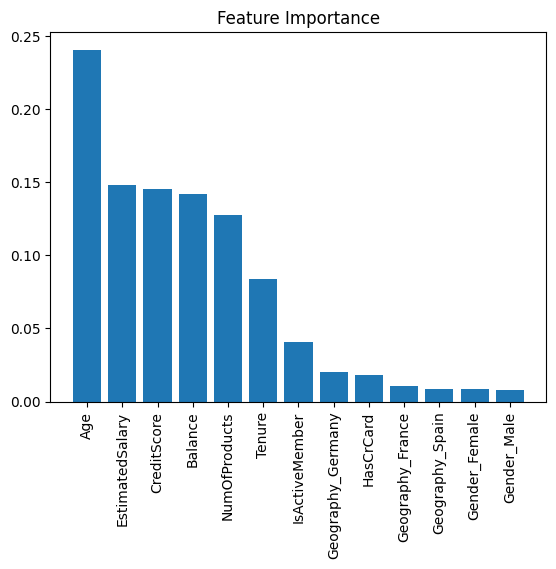

In [39]:
# Feature Importance (using a simple example)
from sklearn.ensemble import RandomForestClassifier

# Assuming 'Exited' is the target variable and the rest are features
# X = df.drop('Exited', axis=1)
# y = df['Exited']

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)

plt.figure()
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [X.columns[i] for i in indices], rotation=90)
plt.title('Feature Importance')
plt.show()

In [40]:
# Selecting and Preparing the Feature Set and Target
X = one_hot_encoded_data.drop(['Exited','RowNumber','CustomerId','Surname','HasCrCard'], axis=1)
y = df['Exited']


In [41]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [42]:
# split train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [43]:
def training_basic_classifier(X_train,y_train):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=101)
    model.fit(X_train, y_train)
    
    return model

In [44]:
def predict_on_test_data(model,X_test):
    y_pred = model.predict(X_test)
    return y_pred

In [45]:
def predict_prob_on_test_data(model,X_test):
    y_pred = model.predict_proba(X_test)[:, 1]
    return y_pred

In [46]:
def get_metrics(y_true, y_pred, y_pred_prob):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,log_loss
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    entropy = log_loss(y_true, y_pred_prob)
    return {'accuracy': round(acc, 2), 'precision': round(prec, 2), 'recall': round(recall, 2), 'entropy': round(entropy, 2)}

In [47]:
#y_pred_prob

In [48]:
def create_roc_auc_plot(clf, y_test , y_pred_prob):
    from sklearn.metrics import roc_curve, roc_auc_score, auc
    import matplotlib.pyplot as plt
    from sklearn import metrics
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    # Calculate AUC (Area Under the ROC Curve)
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
#     metrics.roc_curve(clf, X_data, y_data) 
    plt.savefig('roc_auc_curve.png')

In [49]:
def create_confusion_matrix_plot(clf, y_test, y_pred):
    import matplotlib.pyplot as plt
    #from sklearn.metrics import plot_confusion_matrix
    from sklearn import metrics
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.savefig('confusion_matrix.png')

In [50]:
def hyper_parameter_tuning(X_train, y_train):
    # define random parameters grid
    n_estimators = [5,21,51,101] # number of trees in the random forest
    max_features = ['auto', 'sqrt'] # number of features in consideration at every split
    max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
    min_samples_split = [2, 6, 10] # minimum sample number to split a node
    min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
    bootstrap = [True, False] # method used to sample data points

    random_grid = {'n_estimators': n_estimators,
                    'max_features': max_features,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf,
                    'bootstrap': bootstrap
                  }
    
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier()
    model_tuning = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid,
                   n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
    model_tuning.fit(X_train, y_train)

    print ('Random grid: ', random_grid, '\n')
    # print the best parameters
    print ('Best Parameters: ', model_tuning.best_params_, ' \n')

    best_params = model_tuning.best_params_
    
    n_estimators = best_params['n_estimators']
    min_samples_split = best_params['min_samples_split']
    min_samples_leaf = best_params['min_samples_leaf']
    max_features = best_params['max_features']
    max_depth = best_params['max_depth']
    bootstrap = best_params['bootstrap']
    
    model_tuned = RandomForestClassifier(n_estimators = n_estimators, min_samples_split = min_samples_split,
                                         min_samples_leaf= min_samples_leaf, max_features = max_features,
                                         max_depth= max_depth, bootstrap=bootstrap) 
    model_tuned.fit( X_train, y_train)
    return model_tuned,best_params

In [51]:
model = training_basic_classifier(X_train,y_train)

In [52]:
y_pred = predict_on_test_data(model,X_test)

In [53]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [54]:
y_pred_prob = predict_prob_on_test_data(model,X_test) #model.predict_proba(X_test)

In [55]:
y_pred_prob

array([0.11881188, 0.        , 0.86138614, ..., 0.00990099, 0.23762376,
       0.02970297])

In [56]:
run_metrics = get_metrics(y_test, y_pred, y_pred_prob)

In [57]:
print(run_metrics)

{'accuracy': 0.86, 'precision': np.float64(0.72), 'recall': np.float64(0.45), 'entropy': 0.43}


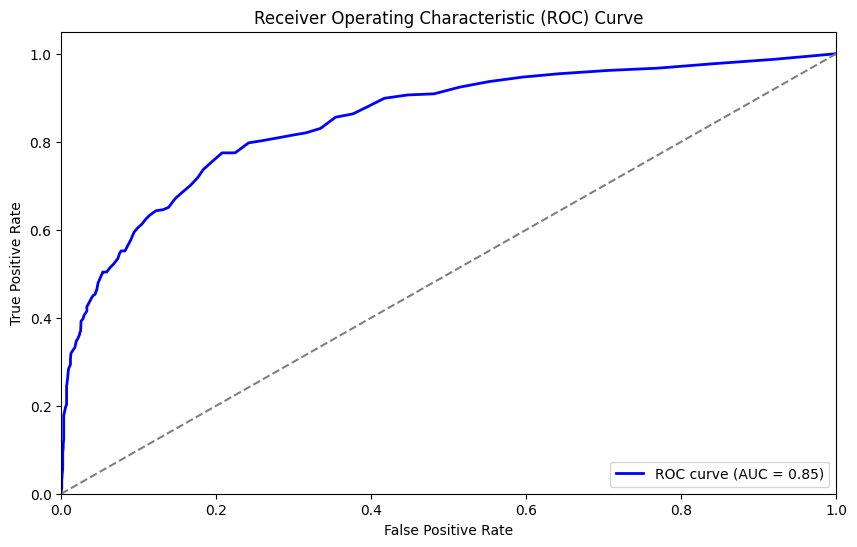

<Figure size 640x480 with 0 Axes>

In [58]:
create_roc_auc_plot(model, y_test, y_pred_prob)

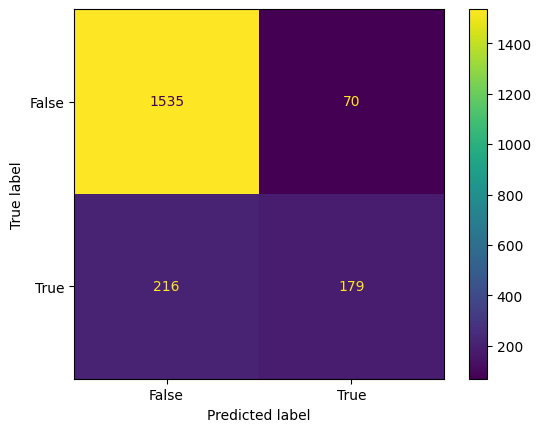

In [59]:
create_confusion_matrix_plot(model, y_test, y_pred)

### MLFlow work Starts from here

In [60]:
experiment_name = "basic_classifier" ##basic classifier
run_name="term_deposit"
run_metrics = get_metrics(y_test, y_pred, y_pred_prob)
print(run_metrics)

{'accuracy': 0.86, 'precision': np.float64(0.72), 'recall': np.float64(0.45), 'entropy': 0.43}


In [61]:
def create_experiment(experiment_name,run_name, run_metrics,model, confusion_matrix_path = None, 
                      roc_auc_plot_path = None, run_params=None):
    import mlflow
    #mlflow.set_tracking_uri("http://localhost:5000") #uncomment this line if you want to use any database like sqlite as backend storage for model
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run():
        
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        mlflow.sklearn.log_model(model, "model")
        
        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_materix')
            
        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")
        
        mlflow.set_tag("tag1", "Random Forest")
        mlflow.set_tags({"tag2":"Randomized Search CV", "tag3":"Production"})
            
    print('Run - %s is logged to Experiment - %s' %(run_name, experiment_name))

In [62]:
create_experiment(experiment_name,run_name,run_metrics,model,'confusion_matrix.png')

2024/10/09 10:09:30 INFO mlflow.tracking.fluent: Experiment with name 'basic_classifier' does not exist. Creating a new experiment.
2024/10/09 10:09:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run - term_deposit is logged to Experiment - basic_classifier


### Function to create an experiment in MLFlow and log parameters, metrics and artifacts files like images etc.

### Create another experiment after tuning hyperparameters and log the best set of parameters for which model gives the optimal performance

In [63]:
import mlflow
experiment_name = "optimized model"
run_name="Random_Search_CV_Tuned_Model"
model_tuned,best_params = hyper_parameter_tuning(X_train, y_train)
run_params = best_params


Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\DELL\Documents\Enterprise guide to dataops and mlops\MLFlow - Experiment tracking\venv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
235 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
199 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\Documents\Enterprise guide to dataops and mlops\MLFlow - Experiment tracking\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DELL\Documents\Enterprise guide to dataops and mlops\MLFlow - Experiment tracking\venv\lib\site-packages\sklearn\base.py", line 1466, in wrapper
   

Random grid:  {'n_estimators': [5, 21, 51, 101], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 101, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}  



In [64]:

y_pred = predict_on_test_data(model_tuned,X_test) #will return the predicted class
y_pred_prob = predict_prob_on_test_data(model_tuned,X_test) #model.predict_proba(X_test)
run_metrics = get_metrics(y_test, y_pred, y_pred_prob)

In [65]:
run_metrics

{'accuracy': 0.86,
 'precision': np.float64(0.77),
 'recall': np.float64(0.46),
 'entropy': 0.36}

In [66]:
for param in run_params:
    print(param, run_params[param])

n_estimators 101
min_samples_split 10
min_samples_leaf 1
max_features sqrt
max_depth 50
bootstrap True


In [67]:
create_experiment(experiment_name,run_name,run_metrics,model_tuned,'confusion_matrix.png', 'roc_auc_curve.png',run_params)

2024/10/09 10:11:48 INFO mlflow.tracking.fluent: Experiment with name 'optimized model' does not exist. Creating a new experiment.
2024/10/09 10:11:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run - Random_Search_CV_Tuned_Model is logged to Experiment - optimized model


In [68]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
5876,704,39,2,111525.02,1,0,199484.96,True,False,False,False,True
6555,641,35,5,0.00,2,0,93148.93,True,False,False,False,True
1448,555,46,4,120392.99,1,0,177719.88,False,True,False,True,False
3351,474,34,9,176311.36,1,0,160213.27,False,True,False,True,False
231,610,40,0,0.00,2,0,62232.60,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
869,435,36,4,0.00,1,1,197015.20,True,False,False,False,True
2928,668,39,0,122104.79,1,0,112946.67,False,True,False,True,False
8436,834,40,7,0.00,2,0,45038.74,False,False,True,False,True
6312,658,28,9,152812.58,1,0,166682.57,False,True,False,True,False


In [69]:
X_test.to_csv('X_test.csv',index = False)